## importing required model

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [37]:
df = pd.read_csv ("House_price.csv")

In [38]:
df.head ()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [39]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

## Univariate Analysis
Univariate analysis means anlysing only one variable or feature. No relationship or correlation are analyzed among multiple variables.

Text(0.65, 1.25, 'House price Prediction Univariate plot')

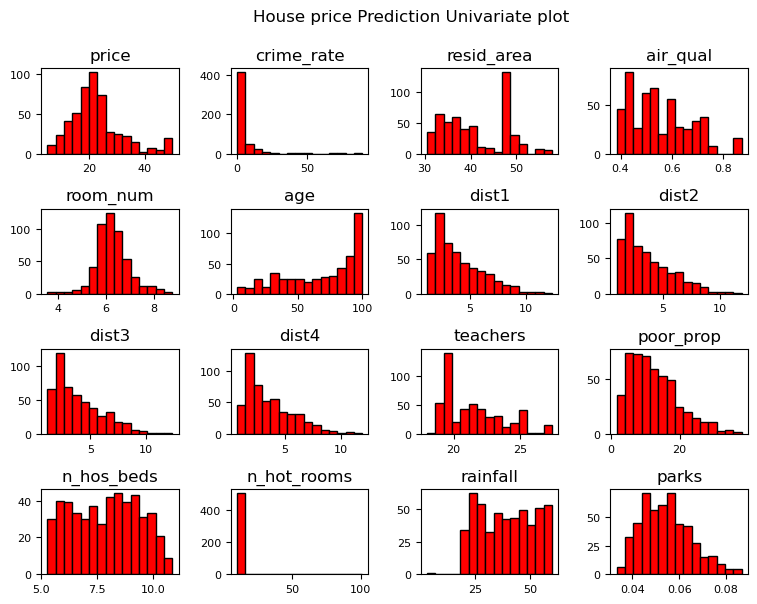

In [40]:
df.hist (bins = 15, color = "red", edgecolor = "black", linewidth = 1,
        xlabelsize = 8, ylabelsize = 8, grid = False)

plt.tight_layout (rect = (0, 0, 1.2, 1.2))

plt.suptitle ("House price Prediction Univariate plot", x = 0.65, y = 1.25,
              fontsize = 12)

## Multivariate Analysis
Analyzing multiple feature variables and their relationships is what multivariate analysis is all about

In [41]:
corr = df.corr ()

Text(0.5, 1.0, 'house price multivariate plot')

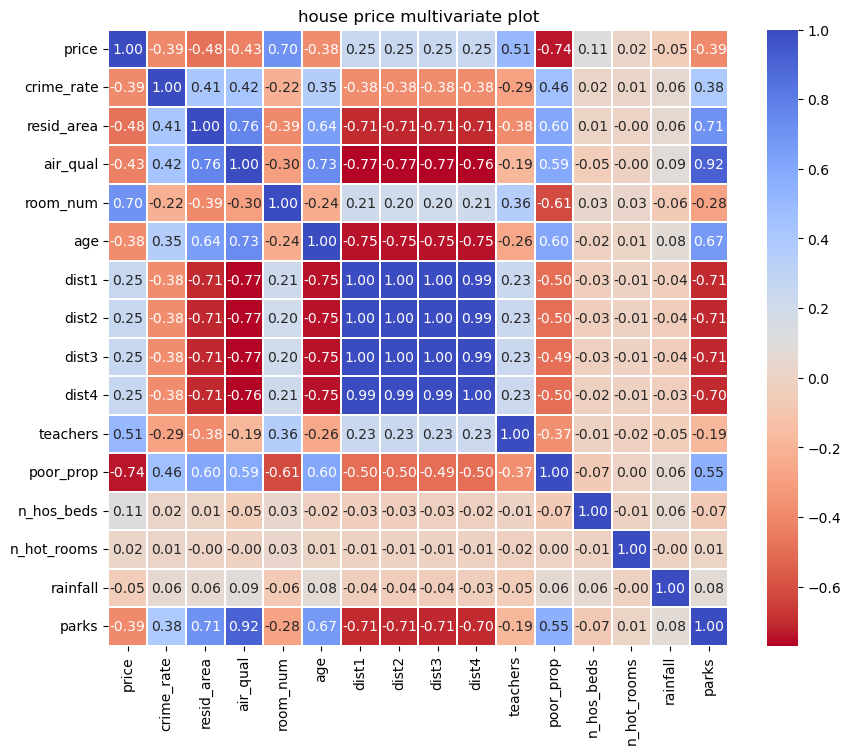

In [42]:
plt.figure (figsize = (10, 8))
sns.heatmap (corr, annot = True, fmt = ".2f", cmap = "coolwarm_r", linewidth = 0.2)
plt.title ("house price multivariate plot", fontsize = 12)

## Handling Outliers

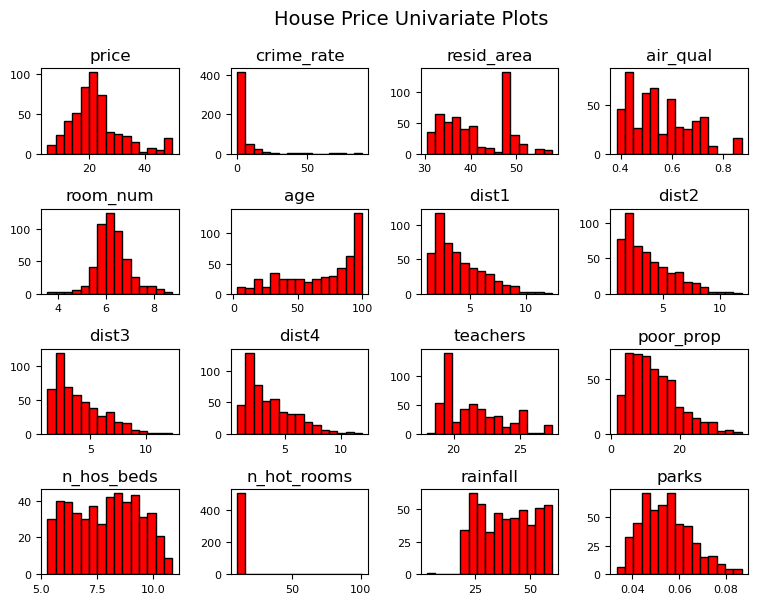

In [43]:
df.hist (bins = 15, color = "red", edgecolor = "black", linewidth = 1.0,
             xlabelsize = 8, ylabelsize = 8, grid = False)
plt.tight_layout (rect = (0, 0, 1.2, 1.2))
rt = plt.suptitle('House Price Univariate Plots', x = 0.65, y = 1.25,
                    fontsize = 14)

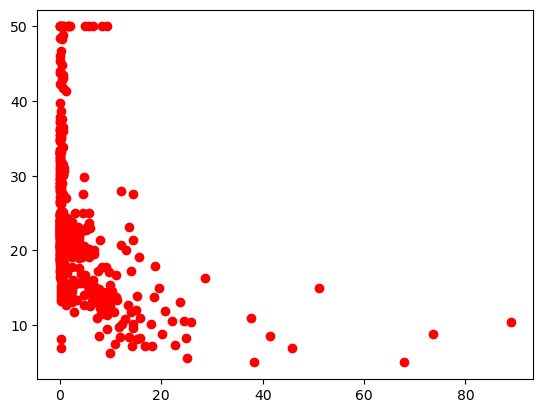

In [44]:
plt.scatter (df["crime_rate"], df["price"], color ="red")

In [45]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

### Observation
outliers in:
- n_hot_rooms
- Rainfall

In [46]:
# Filling the outliers
def p_outliers (df, col, uv_f = 3, lv_f = 0.3):
    uv = np.percentile (df[col], [99]) * uv_f
    lv = np.percentile (df[col], [1]) * lv_f
    return f"lower_limit: {lv}  ---  upper_limit: {uv}"
    

In [47]:
# n_hot_rooms
p_outliers (df, "n_hot_rooms")

'lower_limit: [3.026424]  ---  upper_limit: [46.19856]'

In [48]:
df["n_hot_rooms"][(df.n_hot_rooms > 46.19)] = 46.19

C:\Users\hp\AppData\Local\Temp\ipykernel_4264\2588759076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["n_hot_rooms"][(df.n_hot_rooms > 46.19)] = 46.19


In [49]:
df["n_hot_rooms"][(df.n_hot_rooms) > 46.19]

Series([], Name: n_hot_rooms, dtype: float64)

In [50]:
# rainfall
p_outliers (df, "rainfall")

'lower_limit: [6.]  ---  upper_limit: [180.]'

In [51]:
df["rainfall"][(df.rainfall < 6)] = 6

C:\Users\hp\AppData\Local\Temp\ipykernel_4264\2728824537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rainfall"][(df.rainfall < 6)] = 6


In [52]:
df["rainfall"][(df.rainfall < 6)]

Series([], Name: rainfall, dtype: int64)

## Filling missing values

In [53]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [54]:
df["avg_dist"] = (df.dist1 + df.dist2 + df.dist3 + df.dist4) / 4

In [55]:
del df["dist1"]
del df["dist2"]
del df["dist3"]
del df["dist4"]

## Handling categorical data

In [56]:
df.airport.unique ()

array(['YES', 'NO'], dtype=object)

In [57]:
del df["bus_ter"]

In [58]:
df = pd.get_dummies (df, columns = ["airport", "waterbody"])

In [59]:
del df["airport_NO"]
del df["waterbody_None"]

In [60]:
df.head ()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,4.0875,1,0,0,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,4.9675,0,1,0,0
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.1900,38,0.045764,4.9675,0,0,0,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,6.0650,1,1,0,0
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,6.0625,0,1,0,0
